## 📌 Import Required Libraries

In this section, the required Python libraries for data preprocessing, modeling, and evaluation are imported.
These libraries include tools for machine learning pipelines, model tuning, and performance evaluation.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df=pd.read_csv('D:\pistaacademy(data)\DATA\sonar.all-data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DELL\AppData\Local\Temp\ipykernel_3080\557195300.py:1: SyntaxWarning: invalid escape sequence '\p'
  df=pd.read_csv('D:\pistaacademy(data)\DATA\sonar.all-data.csv')


,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [116]:
df.isnull().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [118]:
df['Label'].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

In [124]:
df['target']=df['Label'].map({'R':0 , 'M':1})

In [128]:
df.corr(numeric_only=True)['target']

Freq_1     0.271694
Freq_2     0.231238
Freq_3     0.192195
Freq_4     0.250638
Freq_5     0.222232
             ...   
Freq_57    0.000933
Freq_58    0.184191
Freq_59    0.130826
Freq_60    0.090055
target     1.000000
Name: target, Length: 61, dtype: float64

## 🚀 Training the Model

The pipeline is trained on the training dataset using the optimal hyperparameters
identified through cross-validation.


In [130]:
from sklearn.model_selection import train_test_split


x=df.drop(['target', 'Label'], axis=1)
y=df['Label']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

## 🔗 Building the Machine Learning Pipeline

A pipeline is created to streamline the preprocessing and modeling steps.
It includes:
- Feature scaling using a scaler
- Classification using the K-Nearest Neighbors (KNN) algorithm

Using a pipeline ensures proper data processing and prevents data leakage during cross-validation.


In [136]:
from sklearn.pipeline import Pipeline

operations=[('scaler', scaler),('knn', knn)]
pipe= Pipeline(operations)

## ⚙️ Defining the Hyperparameter Grid

To optimize the performance of the KNN classifier, a range of values for the number of neighbors (k)
is defined. These values will be evaluated using Grid Search with cross-validation.


In [140]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}

## 🔍 Hyperparameter Optimization Using Grid Search

GridSearchCV is used to find the optimal value of k for the KNN classifier.
A 5-fold cross-validation strategy is applied, and model performance is evaluated using accuracy as the scoring metric.


In [142]:
full_cv_classifier = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy'
)

full_cv_classifier.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

## 📊 Analyzing Cross-Validation Results

The mean cross-validation accuracy for each value of k is extracted and visualized
to understand how the number of neighbors affects model performance.


In [144]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

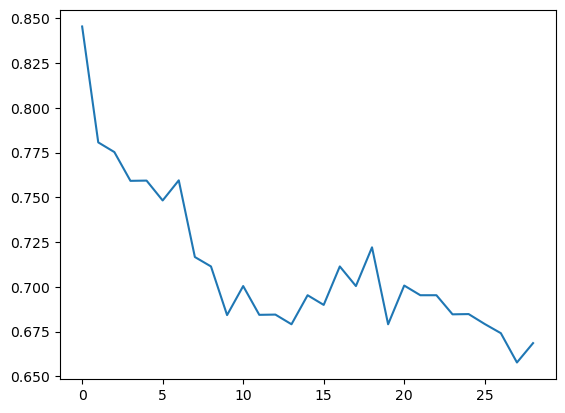

In [148]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

y_pred = full_cv_classifier.predict(x_test)


In [152]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

